# Stock Price Prediction
Bensu GAYRET - December 2022

### References:
- [Stock Trend Prediction ]([https://www.youtube.com/watch?v=s3CnE2tqQdo&list=LL&index=2&ab_channel=GeeksforGeeks])
- [Predicting Future Stock Market Trends with Python & Machine Learning]([https://towardsdatascience.com/predicting-future-stock-market-trends-with-python-machine-learning-2bf3f1633b3c])
- [Stock Price Prediction ]([https://www.kaggle.com/code/l33tc0d3r/stock-price-predictions])

In [175]:
#Imports and Data Collection

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
#Data readers 
#!pip install pandas-datareader 
import pandas_datareader as data
import yfinance as yf

In [70]:
# Set the start and end date
start_date = '2012-12-12'
end_date = '2022-12-12'

# Set the ticker
ticker = 'AAPL' #company names [EX: 'AAPL':APPLE ,'AMZN':AMAZON]

# Get the data
data = yf.download(ticker, start_date, end_date)
#data = data.DataReader(ticker, 'yahoo' , start_date, end_date)

# Print 5 rows
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-12-12,19.563213,19.571428,19.152500,19.250000,16.554762,487144000
2012-12-13,18.969643,19.201429,18.778570,18.917500,16.268818,625259600
2012-12-14,18.383928,18.504642,18.056429,18.206785,15.657619,1009579200
2012-12-17,18.176071,18.571428,17.901072,18.529642,15.935266,757607200
2012-12-18,18.750000,19.103571,18.580357,19.067858,16.398119,625685200


In [71]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-05,147.770004,150.919998,145.770004,146.630005,146.630005,68826400
2022-12-06,147.070007,147.300003,141.919998,142.910004,142.910004,64727200
2022-12-07,142.190002,143.369995,140.000000,140.940002,140.940002,69721100
2022-12-08,142.360001,143.520004,141.100006,142.649994,142.649994,62128300
2022-12-09,142.339996,145.570007,140.899994,142.160004,142.160004,76069500


In [72]:
data = data.reset_index()
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-12-12,19.563213,19.571428,19.152500,19.250000,16.554762,487144000
1,2012-12-13,18.969643,19.201429,18.778570,18.917500,16.268818,625259600
2,2012-12-14,18.383928,18.504642,18.056429,18.206785,15.657619,1009579200
3,2012-12-17,18.176071,18.571428,17.901072,18.529642,15.935266,757607200
4,2012-12-18,18.750000,19.103571,18.580357,19.067858,16.398119,625685200


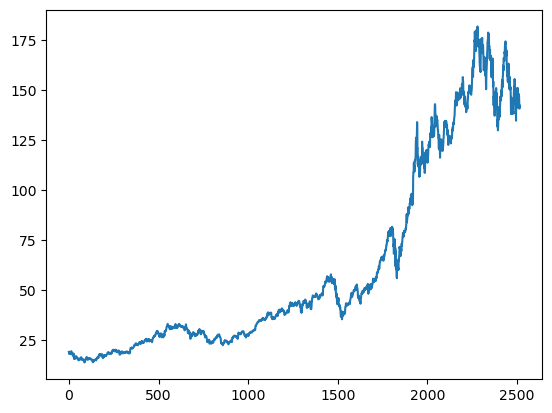

In [73]:
#Data from the ‘Close’ column
plt.plot(data.Close) 

# Data Processing & Feature Engineering
If we want to know when a stock will increase or decrease. we would just need to look into the future and observe the price to determine if we should buy or sell right now. 

Pandas dataframe.rolling() function provides the feature of rolling window calculations. The concept of rolling window calculation is most primarily used in signal processing and time-series data. In very simple words we take a window size of k at a time and perform some desired mathematical operation on it. A window of size k means k consecutive values at a time. In a very simple case, all the ‘k’ values are equally weighted.

(her seferinde k pencere boyutunu alıyoruz ve üzerinde istenen bazı matematiksel işlemleri gerçekleştiriyoruz. k boyutunda bir pencere, bir seferde k ardışık değer anlamına gelir. Çok basit bir durumda, tüm 'k' değerleri eşit ağırlıklıdır)

In [74]:
avr100= data.Close.rolling(100).mean() #dataframe.rolling() function provides the feature of rolling window calculations
avr100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2512    152.940799
2513    152.868199
2514    152.806899
2515    152.723399
2516    152.614599
Name: Close, Length: 2517, dtype: float64

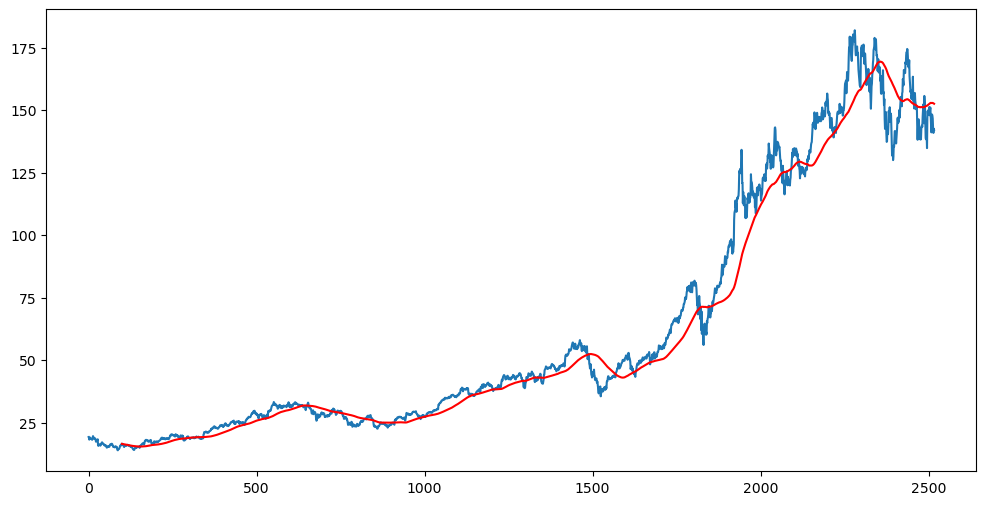

In [75]:
plt.figure(figsize=(12,6))
plt.plot(data.Close) 
plt.plot(avr100,'r') 

In [76]:
avr200= data.Close.rolling(200).mean() 
avr200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    153.85670
2513    153.73475
2514    153.61785
2515    153.53075
2516    153.42785
Name: Close, Length: 2517, dtype: float64

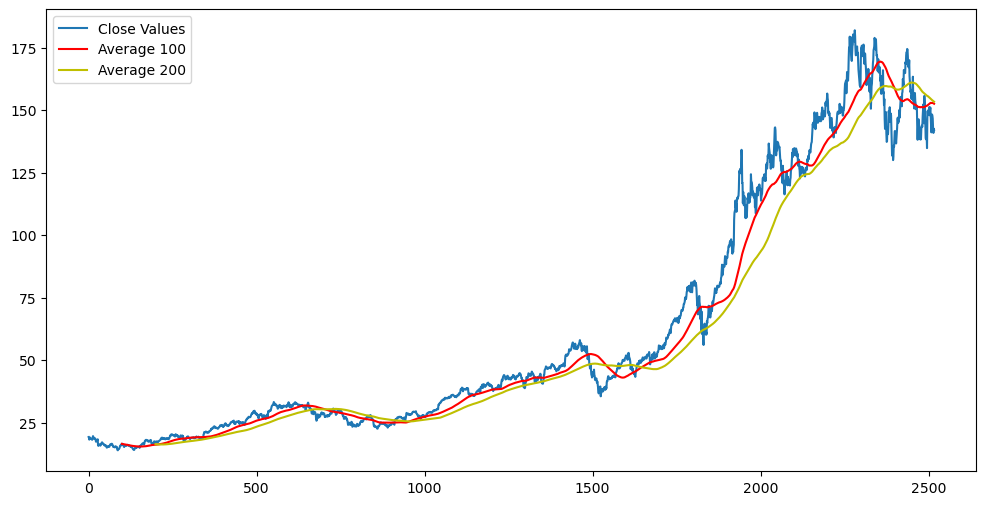

In [77]:
plt.figure(figsize=(12,6))
plt.plot(data.Close) 
plt.plot(avr100,'r') 
plt.plot(avr200,'y') 
plt.legend(['Close Values','Average 100','Average 200'])

In [78]:
data.shape

(2517, 7)

In [79]:
# Drop unnecessary columns
data= data.drop(['Date','Adj Close'], axis=1)

In [80]:
data

,Open,High,Low,Close,Volume
0,19.563213,19.571428,19.152500,19.250000,487144000
1,18.969643,19.201429,18.778570,18.917500,625259600
2,18.383928,18.504642,18.056429,18.206785,1009579200
3,18.176071,18.571428,17.901072,18.529642,757607200
4,18.750000,19.103571,18.580357,19.067858,625685200
...,...,...,...,...,...
2512,147.770004,150.919998,145.770004,146.630005,68826400
2513,147.070007,147.300003,141.919998,142.910004,64727200
2514,142.190002,143.369995,140.000000,140.940002,69721100
2515,142.360001,143.520004,141.100006,142.649994,62128300


# Model Creation

In [81]:
# Split up the data into a train set and test set
data_training = pd.DataFrame(data["Close"][0:int(len(data)*0.70)])
data_testing = pd.DataFrame(data["Close"][int(len(data)*0.70): int(len(data)) ])
print(data_training.shape) # %70
print(data_testing.shape) # %30

(1761, 1)
(756, 1)


In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [83]:
data_training_array= scaler.fit_transform(data_training)
data_training_array

array([[0.09868788],
       [0.09249953],
       [0.07927201],
       ...,
       [1.        ],
       [0.98236563],
       [0.98962414]])

In [84]:
data_training_array.shape

(1761, 1)

In [85]:
x_train=[]
y_train=[]
for i in range (100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])
               
x_train, y_train =np.array(x_train) , np.array(y_train)           
            

In [86]:
x_train.shape

(1661, 100, 1)

In [87]:
from sklearn.model_selection import train_test_split

# ML Model

In [88]:
from keras.models import Sequential
from keras.layers import Dense, Dropout , LSTM

In [89]:
model = Sequential() #creating a model
model.add(LSTM(units=50, activation= 'relu' , return_sequences= True,
               input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation= 'relu' , return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation= 'relu' , return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation= 'relu' ))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [90]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [91]:
model.compile(optimizer="adam",loss="mse") #mean square error 
model.fit(x_train, y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 15s 223ms/step - loss: 0.0364
Epoch 2/50
52/52 [==============================] - 11s 216ms/step - loss: 0.0067
Epoch 3/50
52/52 [==============================] - 11s 219ms/step - loss: 0.0060
Epoch 4/50
52/52 [==============================] - 11s 210ms/step - loss: 0.0063
Epoch 5/50
52/52 [==============================] - 11s 212ms/step - loss: 0.0056
Epoch 6/50
52/52 [==============================] - 11s 212ms/step - loss: 0.0051
Epoch 7/50
52/52 [==============================] - 11s 207ms/step - loss: 0.0047
Epoch 8/50
52/52 [==============================] - 11s 217ms/step - loss: 0.0051
Epoch 9/50
52/52 [==============================] - 11s 206ms/step - loss: 0.0050
Epoch 10/50
52/52 [==============================] - 11s 202ms/step - loss: 0.0044
Epoch 11/50
52/52 [==============================] - 11s 213ms/step - loss: 0.0038
Epoch 12/50
52/52 [==============================] - 11s 207ms/step - loss: 0.0039
Epoch 13/50
5

In [92]:
#Save model as a h5 file format
model.save('keras_model_3.h5')

In [146]:
from tensorflow import keras
model2 = keras.models.load_model('keras_model_2.h5')

In [147]:
data_testing.head()

,Close
1761,67.692497
1762,67.864998
1763,68.787498
1764,69.964996
1765,70.102501


In [148]:
data_training.tail(100)

,Close
1661,51.805000
1662,52.209999
1663,52.167500
1664,51.755001
1665,51.935001
...,...
1756,65.434998
1757,66.394997
1758,67.677498
1759,66.730003


Using last 100 days ,we are going to generate a prediction

In [149]:
past100_days=data_training.tail(100)

In [189]:
#Concat is recommended
#final_df= past100_days.append(data_testing, ignore_index=True)
final_df= pd.concat([past100_days, data_testing], ignore_index=True)

In [190]:
final_df.head()

,Close
0,51.805000
1,52.209999
2,52.167500
3,51.755001
4,51.935001


In [191]:
final_df.shape

(856, 1)

In [192]:
input_data = scaler.fit_transform(final_df)
input_data

AttributeError: 'numpy.ndarray' object has no attribute 'fit_transform'

In [193]:
input_data.shape

(856, 1)

In [194]:
x_test = []
y_test = []

for i in range (100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

In [195]:
x_test, y_test =np.array(x_test) , np.array(y_test)    
print(x_test.shape)
print(y_test.shape)             

(756, 100, 1)
(756,)


# Making Predictions

In [156]:
y_predicted = model2.predict(x_test)

24/24 [==============================] - 2s 70ms/step


In [157]:
print(' prediction is ', y_predicted)

 prediction is  [[0.16699025]
 [0.16726628]
 [0.16761631]
 [0.16808377]
 [0.16873264]
 [0.16961809]
 [0.1707654 ]
 [0.17217053]
 [0.17379351]
 [0.1755855 ]
 [0.1775298 ]
 [0.17963289]
 [0.1818954 ]
 [0.18431018]
 [0.18686628]
 [0.1895802 ]
 [0.19246323]
 [0.19549707]
 [0.19861363]
 [0.20176923]
 [0.20497355]
 [0.20824455]
 [0.21163721]
 [0.2151556 ]
 [0.21874978]
 [0.22236219]
 [0.22595446]
 [0.22945608]
 [0.2327871 ]
 [0.23586592]
 [0.23860809]
 [0.24087366]
 [0.24262723]
 [0.24392653]
 [0.24491481]
 [0.24558672]
 [0.24587514]
 [0.24584348]
 [0.24563205]
 [0.24543959]
 [0.24538301]
 [0.24552989]
 [0.24587414]
 [0.24646327]
 [0.2473041 ]
 [0.24835771]
 [0.2494942 ]
 [0.25063112]
 [0.25164625]
 [0.2523511 ]
 [0.252466  ]
 [0.251765  ]
 [0.25014156]
 [0.24755   ]
 [0.24404442]
 [0.23997112]
 [0.2356387 ]
 [0.23141122]
 [0.22750604]
 [0.22405826]
 [0.22095846]
 [0.21817422]
 [0.21566719]
 [0.21321887]
 [0.21077931]
 [0.20818856]
 [0.20534022]
 [0.20215598]
 [0.1986018 ]
 [0.19462144]
 [0.

In [158]:
y_predicted.shape

(756, 1)

In [159]:
y_predicted

array([[0.16699025],
       [0.16726628],
       [0.16761631],
       [0.16808377],
       [0.16873264],
       [0.16961809],
       [0.1707654 ],
       [0.17217053],
       [0.17379351],
       [0.1755855 ],
       [0.1775298 ],
       [0.17963289],
       [0.1818954 ],
       [0.18431018],
       [0.18686628],
       [0.1895802 ],
       [0.19246323],
       [0.19549707],
       [0.19861363],
       [0.20176923],
       [0.20497355],
       [0.20824455],
       [0.21163721],
       [0.2151556 ],
       [0.21874978],
       [0.22236219],
       [0.22595446],
       [0.22945608],
       [0.2327871 ],
       [0.23586592],
       [0.23860809],
       [0.24087366],
       [0.24262723],
       [0.24392653],
       [0.24491481],
       [0.24558672],
       [0.24587514],
       [0.24584348],
       [0.24563205],
       [0.24543959],
       [0.24538301],
       [0.24552989],
       [0.24587414],
       [0.24646327],
       [0.2473041 ],
       [0.24835771],
       [0.2494942 ],
       [0.250

In [165]:
scaler=scaler.scale_

AttributeError: 'numpy.ndarray' object has no attribute 'scale_'

In [166]:
scaler[0]

0.007480830628348793

In [161]:
scaler_factor =1/scaler[0]
y_predicted = y_predicted * scaler_factor
y_test = y_test *scaler_factor

In [229]:
y = np.reshape(y_test, (1,756)).T

In [230]:
ya=y.tolist()
ya

[[0.14481016519045176],
 [0.14610061303977862],
 [0.15300168386036705],
 [0.1618103459444694],
 [0.1628389944003923],
 [0.16158593015749223],
 [0.16210958601850833],
 [0.16102489069004944],
 [0.16955303304043035],
 [0.17005796856112898],
 [0.1806059671427207],
 [0.18040021462185285],
 [0.1836169740750111],
 [0.1876005255164802],
 [0.2001309396486477],
 [0.19466990817730145],
 [0.19910229119272482],
 [0.1964653486215352],
 [0.20544232254587036],
 [0.21748646442344866],
 [0.21879557553888462],
 [0.2311950614372461],
 [0.2231905749478812],
 [0.22068450353628943],
 [0.22797830198408786],
 [0.23450536551778378],
 [0.2304657101295704],
 [0.23257905391395228],
 [0.23544046934632734],
 [0.23371985318915545],
 [0.21621473691443927],
 [0.2325603335736347],
 [0.244997203078423],
 [0.2441182031966237],
 [0.21726204863647147],
 [0.2156723607131057],
 [0.23472978130476085],
 [0.23959233262802926],
 [0.24662427460821545],
 [0.2369366126423138],
 [0.2397793077343714],
 [0.23615110031368558],
 [0.25034

In [224]:
y_p = np.reshape(y_predicted, (1,756)).T
yp=y_p.tolist()
yp

[[0.1669902503490448],
 [0.16726627945899963],
 [0.16761630773544312],
 [0.1680837720632553],
 [0.1687326431274414],
 [0.16961808502674103],
 [0.17076539993286133],
 [0.17217053472995758],
 [0.1737935096025467],
 [0.17558549344539642],
 [0.17752979695796967],
 [0.17963288724422455],
 [0.1818954050540924],
 [0.184310182929039],
 [0.18686628341674805],
 [0.18958020210266113],
 [0.1924632340669632],
 [0.195497065782547],
 [0.19861362874507904],
 [0.20176923274993896],
 [0.20497354865074158],
 [0.20824454724788666],
 [0.2116372138261795],
 [0.21515560150146484],
 [0.2187497764825821],
 [0.2223621904850006],
 [0.22595445811748505],
 [0.2294560819864273],
 [0.2327871024608612],
 [0.23586592078208923],
 [0.23860809206962585],
 [0.24087366461753845],
 [0.24262723326683044],
 [0.2439265251159668],
 [0.24491481482982635],
 [0.24558672308921814],
 [0.24587513506412506],
 [0.24584348499774933],
 [0.24563205242156982],
 [0.2454395890235901],
 [0.24538300931453705],
 [0.2455298900604248],
 [0.245874

In [233]:
#Actual Value, Predictions
y_predicted = model2.predict(x_test)
pred_df = pd.DataFrame({'Actual': ya, 'Predicted': yp})
pred_df.head()

24/24 [==============================] - 2s 80ms/step


,Actual,Predicted
0,[0.14481016519045176],[0.1669902503490448]
1,[0.14610061303977862],[0.16726627945899963]
2,[0.15300168386036705],[0.16761630773544312]
3,[0.1618103459444694],[0.1680837720632553]
4,[0.1628389944003923],[0.1687326431274414]


In [235]:
# Measure the Accuracy Score
Acc=[];
from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(ya, yp)))
Acc.append(r2_score(ya, yp))

Accuracy score of the predictions: 0.9635065117014486


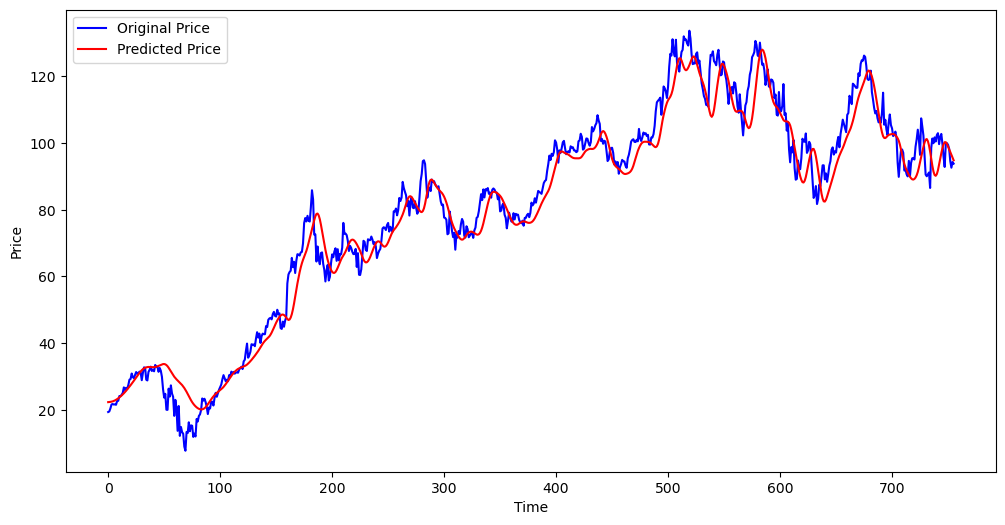

In [162]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label ='Original Price')
plt.plot(y_predicted , 'r', label ='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Summary
In this notebook, we discovered and explored APPLE stock data.

Specifically, we learned:

- How to load stock market data from the YAHOO Finance website using yfinance.
- How to explore and visualize time-series data using Numpy, Pandas and Matplotlib.
- How to create the model of stocks with LSTM.
- How to make the prediction and control the accuracy of them.